# Computer vision practice

## Getting the data (food101)

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !mkdir -p "/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101_dansbecker"

In [ ]:
# !kaggle datasets download -d dansbecker/food-101 -p "/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101_dansbecker"

Well, it didn't work, I will try using another approach

In [ ]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# #Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
# !mv /content/pizza_steak "/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101"

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/test'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/test/pizza'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/test/steak'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train'.
There are 0 directories and 750 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train/pizza'.
There are 0 directories and 750 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train/steak'.


In [ ]:
#Another way to see the length of an directory
num_pizzas = len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train/pizza"))
num_pizzas

750

In [ ]:
# Let's get the classnames programmatically
import os
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape {img.shape}')

  return img

Image shape (512, 512, 3)


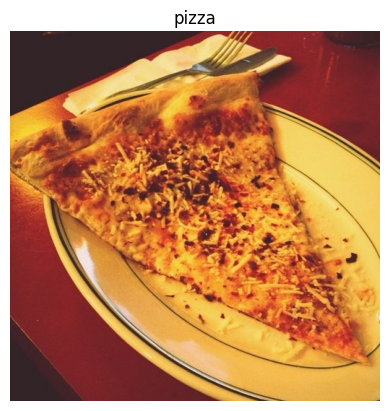

In [ ]:
img = view_random_image(target_dir="/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train", target_class="pizza")

array([[[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 56,  36,  38],
        [ 56,  36,  38],
        [ 56,  36,  38]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 56,  36,  38],
        [ 56,  36,  38],
        [ 56,  36,  38]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 55,  35,  37],
        [ 55,  35,  37],
        [ 55,  35,  37]],

       ...,

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [194, 163,  96],
        [190, 159,  94],
        [178, 149,  83]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [165, 139,  80],
        [144, 118,  61],
        [123,  98,  42]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 94,  69,  15],
        [ 86,  63,  11],
        [ 81,  58,   8]]], dtype=uint8)
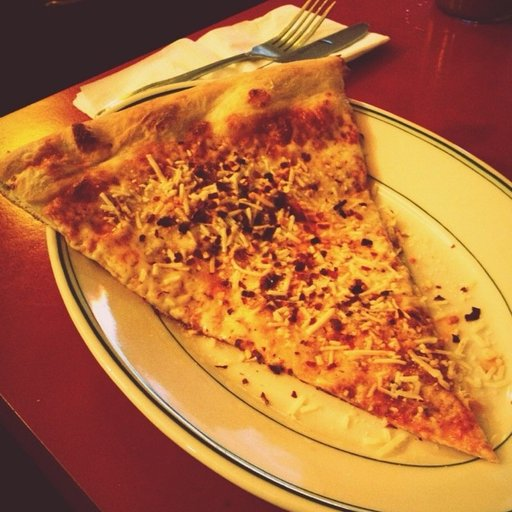

In [ ]:
img

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 56,  36,  38],
        [ 56,  36,  38],
        [ 56,  36,  38]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 56,  36,  38],
        [ 56,  36,  38],
        [ 56,  36,  38]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 55,  35,  37],
        [ 55,  35,  37],
        [ 55,  35,  37]],

       ...,

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [194, 163,  96],
        [190, 159,  94],
        [178, 149,  83]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [165, 139,  80],
        [144, 118,  61],
        [123,  98,  42]],

       [[ 51,  36,  39],
        [ 51,  36,  39],
        [ 51,  36,  39],
        ...,
        [ 94,  69,  1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(0)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/food101/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(244, 244),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=0)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(244, 244),
                                             batch_size=32,
                                             class_mode='binary',
                                             seed=0)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(244, 244, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2, padding='valid'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 455s 10s/step - accuracy: 0.6027 - loss: 0.6608 - val_accuracy: 0.8140 - val_loss: 0.4371
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.7769 - loss: 0.4874 - val_accuracy: 0.8400 - val_loss: 0.3820
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.8329 - loss: 0.4048 - val_accuracy: 0.8040 - val_loss: 0.4087


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 240, 240, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 116, 116, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33640)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        33,641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,955 (429.52 KB)

 Trainable params: 36,651 (143.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,304 (286.35 KB)

Text(0.5, 0, 'epochs')

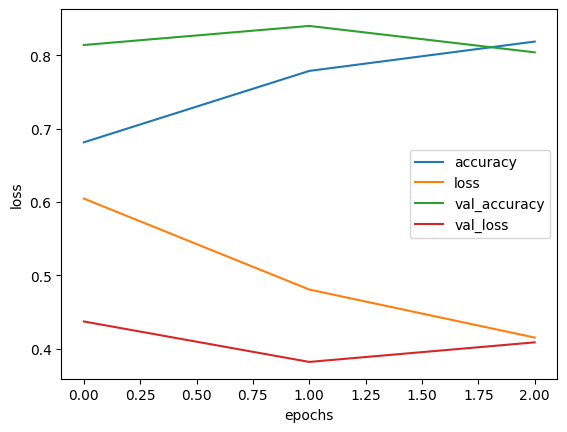

In [ ]:
# Plot the history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Augmenting the data

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(244, 244),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=0,
                                               shuffle=False)

Found 1500 images belonging to 2 classes.


In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(244, 244),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   seed=0,
                                                                   shuffle=False)

Found 1500 images belonging to 2 classes.


**Note** Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model

### Visualize some augmented data

In [ ]:
images, labels = train_data.__next__()
augmented_images, _ = train_data_augmented.__next__() # labels aren't augmented, only input data.

Text(0.5, 1.0, 'Augmented image')

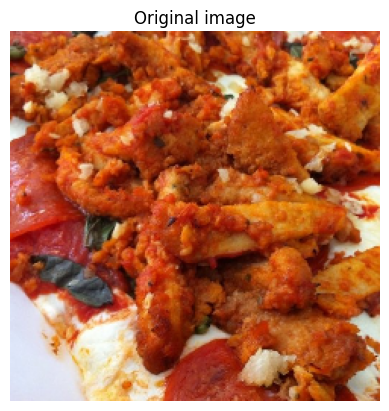

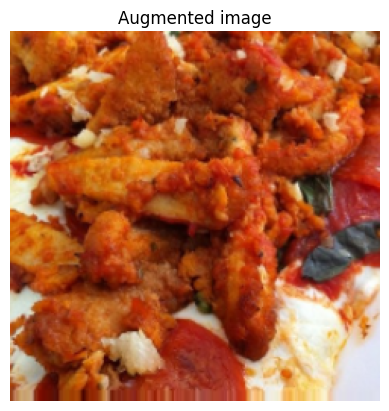

In [ ]:
# Show original image and augmented image
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.axis('off')
plt.title('Original image')
plt.figure()
plt.imshow(augmented_images[random_number])
plt.axis('off')
plt.title('Augmented image')

In [ ]:
# Fit the model to the augmented data
history_2 = model_1.fit(train_data_augmented,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 693ms/step - accuracy: 0.6658 - loss: 0.7320 - val_accuracy: 0.7640 - val_loss: 0.5491
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 612ms/step - accuracy: 0.7058 - loss: 0.5954 - val_accuracy: 0.8280 - val_loss: 0.4376
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 627ms/step - accuracy: 0.7476 - loss: 0.5277 - val_accuracy: 0.7500 - val_loss: 0.4824


Now, trying with the shuffled data and see the performance

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(244, 244),
                                                                         batch_size=32,
                                                                         class_mode='binary',
                                                                         seed=0,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
history_3 = model_1.fit(train_data_augmented_shuffled,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - accuracy: 0.7292 - loss: 0.5731 - val_accuracy: 0.8200 - val_loss: 0.4310
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 610ms/step - accuracy: 0.7521 - loss: 0.5180 - val_accuracy: 0.8600 - val_loss: 0.3879
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 612ms/step - accuracy: 0.7962 - loss: 0.4708 - val_accuracy: 0.8220 - val_loss: 0.4176


Just shuffling, you can see that the accuracy increased

### Predicting the example input image

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

--2025-07-22 06:26:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-07-22 06:26:59 (39.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



<Figure size 640x480 with 0 Axes>

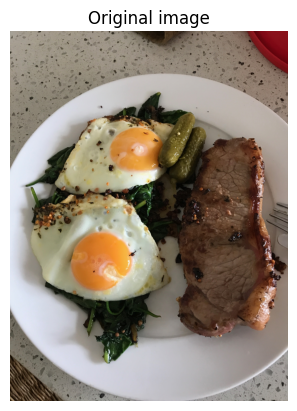

<Figure size 640x480 with 0 Axes>

In [ ]:
steak = mpimg.imread('/content/03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')
plt.title('Original image')
plt.figure()

In [ ]:
steak.shape

(4032, 3024, 3)

Create a function to preprocess the input data

In [ ]:
def load_prep_image(filename, img_shape=244):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
steak = load_prep_image('/content/03-steak.jpeg')
steak

<tf.Tensor: shape=(1, 244, 244, 3), dtype=float32, numpy=
array([[[[0.62829334, 0.61260706, 0.5694698 ],
         [0.6673293 , 0.6408105 , 0.5997305 ],
         [0.6288645 , 0.61317825, 0.56611943],
         ...,
         [0.5279978 , 0.05740957, 0.09270369],
         [0.5383952 , 0.07957173, 0.11094428],
         [0.5240058 , 0.07302541, 0.1004764 ]],

        [[0.6354672 , 0.6197809 , 0.57664365],
         [0.6364191 , 0.62073284, 0.573674  ],
         [0.6332691 , 0.6175828 , 0.570524  ],
         ...,
         [0.5269163 , 0.05632809, 0.09162221],
         [0.5549276 , 0.08433936, 0.11963347],
         [0.52707314, 0.06824964, 0.09962219]],

        [[0.6360334 , 0.62034714, 0.5732883 ],
         [0.6626118 , 0.6390824 , 0.59202355],
         [0.65419877, 0.6377974 , 0.5907386 ],
         ...,
         [0.5446726 , 0.07408439, 0.111761  ],
         [0.53613055, 0.07730698, 0.10867953],
         [0.5340747 , 0.06348649, 0.0987806 ]],

        ...,

        [[0.56892025, 0.4865673 , 

In [ ]:
# Predict the input
model_1.predict(steak)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


array([[0.9253533]], dtype=float32)

In [ ]:
def pred_plot(model, filename, class_names=class_names):
  img = load_prep_image(filename)
  pred = model.predict(img)
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(mpimg.imread(filename))
  plt.title(f'Prediction: {pred_class}')
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


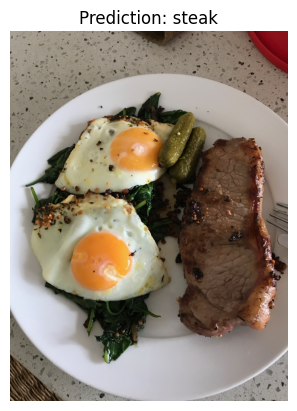

In [ ]:
pred_plot(model=model_1, filename='/content/03-steak.jpeg')

## Working with Multi_class data

In [ ]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# zipref = zipfile.ZipFile('10_food_classes_all_data.zip')
# zipref.extractall()
# zipref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data
There are 10 directories and 0 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test
There are 0 directories and 250 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in /content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/10_food_classes_all_data/test'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape (512, 382, 3)


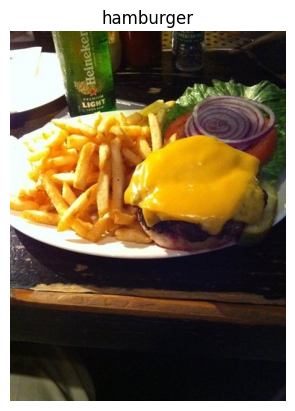

In [ ]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode='categorical')
test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Build a model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(256, 256, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Fit the model

In [ ]:
history_4 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2750s 12s/step - accuracy: 0.1717 - loss: 2.2223 - val_accuracy: 0.2376 - val_loss: 2.0829
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 219ms/step - accuracy: 0.3574 - loss: 1.8763 - val_accuracy: 0.2968 - val_loss: 1.9776
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 52s 219ms/step - accuracy: 0.6189 - loss: 1.1894 - val_accuracy: 0.2812 - val_loss: 2.2549
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 90s 254ms/step - accuracy: 0.9013 - loss: 0.3570 - val_accuracy: 0.2516 - val_loss: 3.6067
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 74s 219ms/step - accuracy: 0.9847 - loss: 0.0726 - val_accuracy: 0.2396 - val_loss: 4.8563


In [ ]:
train_datagen2_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data2_augmented = train_datagen2_augmented.flow_from_directory(train_dir,
                                                                     target_size=(256, 256),
                                                                     batch_size=32,
                                                                     class_mode='categorical',
                                                                     seed=0)

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data2_augmented,
            epochs=5,
            steps_per_epoch=len(train_data2_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 164s 698ms/step - accuracy: 0.1741 - loss: 2.2345 - val_accuracy: 0.3064 - val_loss: 1.9464
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 191s 652ms/step - accuracy: 0.2813 - loss: 2.0405 - val_accuracy: 0.3176 - val_loss: 1.8926
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 162s 690ms/step - accuracy: 0.3104 - loss: 1.9599 - val_accuracy: 0.3820 - val_loss: 1.8087
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 153s 650ms/step - accuracy: 0.3316 - loss: 1.9395 - val_accuracy: 0.4060 - val_loss: 1.7718
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 645ms/step - accuracy: 0.3486 - loss: 1.8995 - val_accuracy: 0.4252 - val_loss: 1.6868


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg

--2025-07-22 07:51:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-07-22 07:51:25 (54.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
# Preprocess the input data
pizza_dad = load_prep_image('/content/03-pizza-dad.jpeg', img_shape=256)
pizza_dad

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.34315258, 0.35736826, 0.2995251 ],
         [0.47135416, 0.50272673, 0.42037377],
         [0.70779717, 0.7316789 , 0.6518229 ],
         ...,
         [0.05588235, 0.06764706, 0.04019608],
         [0.05212929, 0.07173713, 0.04428615],
         [0.06986826, 0.08163296, 0.05418199]],

        [[0.9460784 , 0.9642157 , 0.9490196 ],
         [0.9513174 , 0.9586703 , 0.9493566 ],
         [0.94609374, 0.96410847, 0.9502604 ],
         ...,
         [0.03958333, 0.05919117, 0.0317402 ],
         [0.06102941, 0.07279412, 0.04534314],
         [0.05824142, 0.07000612, 0.04255515]],

        [[0.11758579, 0.13327205, 0.14503677],
         [0.20352328, 0.21920955, 0.22561274],
         [0.2074908 , 0.21283701, 0.22140013],
         ...,
         [0.07760417, 0.08936887, 0.06191789],
         [0.09834559, 0.1101103 , 0.08265931],
         [0.05992647, 0.08737745, 0.0560049 ]],

        ...,

        [[0.2563266 , 0.17397365, 

In [ ]:
# Predict the input
model_3.predict(pizza_dad)

## Saving and Loading the model

In [ ]:
# Save the model
model_3.save('model_3')

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('model_3')

ValueError: File format not supported: filepath=model_3. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_3, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).